### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>


In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('The E-commerce Dataset.csv')
df

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ecom = pd.read_csv('The E-commerce Dataset.csv')
ecom.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


In [387]:
# count null
print ("null amount:")
print(ecom.isnull().sum())

# print length before 
print("")
print ("original shape:")
print(ecom.shape)

# remove null
clean_ecom = ecom.dropna(subset = ["gender", "rating", "helpfulness"])


# remove none
clean_ecom = clean_ecom.drop(clean_ecom.index[clean_ecom.review == "none"] )

# print length after
print(clean_ecom.shape)


null amount:
userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

original shape:
(20000, 11)
(19916, 11)


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [388]:
# no. of uniques
print ("Unique Users:" ,len(clean_ecom.userId.unique()))
print ("Unique Reviews:" ,len(clean_ecom.review.unique()))
print ("Unique Items:",len(clean_ecom.item.unique()))
print ("Unique Categories:", len(clean_ecom.category.unique()))

# Descriptive Stats
print("")
print ("Rating Record Stats:")
print("")

print(clean_ecom.rating.describe())

print("")
print ("Gender Record Stats:")

sex = clean_ecom.groupby('gender')
print(sex.rating.describe())

print("")
print ("Item Record Stats:")

itemgroup = clean_ecom.groupby('item')
print(itemgroup.rating.describe())

Unique Users: 8562
Unique Reviews: 19459
Unique Items: 89
Unique Categories: 9

Rating Record Stats:

count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

Gender Record Stats:
          count      mean       std  min  25%  50%  75%  max
gender                                                      
F        9793.0  3.717451  1.395355  1.0  3.0  4.0  5.0  5.0
M       10123.0  3.686654  1.413098  1.0  3.0  4.0  5.0  5.0

Item Record Stats:
                       count      mean       std  min   25%  50%  75%  max
item                                                                      
AOL (America Online)   939.0  2.500532  1.368528  1.0  1.00  2.0  4.0  5.0
All Advantage          657.0  3.412481  1.541706  1.0  2.00  4.0  5.0  5.0
Alta Vista (by 1stUp)  157.0  3.541401  1.263341  1.0  3.00  4.0  4.0  5.0
Amazon.com             240.0  3.

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

X- axis: Books, Games, Hotels & Travel, Kids & Family, Media, Movies, Online Stores & Services, Personal Finance, Restaurants & Gourmet
Analysis:
Average rating for each catergory tend to be around the 4.0 rating, with the excpetion of booms, games, hotels & travel, and media. The latter three appears to have a higher average of rating compared to the other categories. In addition, there is less vareity in ratings, with the wiskers being shorter than the other plots. This shows that these three categories are more agreeable in terms of higher ratings among users. Whereas in other categories with a longer range, the rating results are more varied. The media catergory has a lower rating average showign that more people are rating media with lower scores


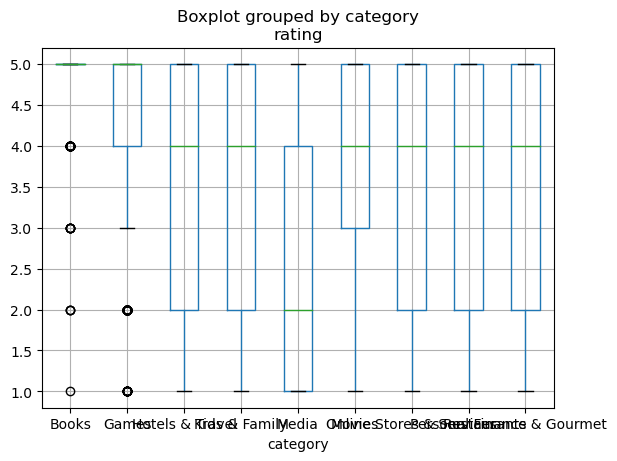

In [389]:
clean_ecom.boxplot("rating",by ="category")

print('X- axis: Books, Games, Hotels & Travel, Kids & Family, Media, Movies, Online Stores & Services, Personal Finance, Restaurants & Gourmet' )
print ('Analysis:')
print( "Average rating for each catergory tend to be around the 4.0 rating, with the excpetion of booms, games, hotels & travel, and media. The latter three appears to have a higher average of rating compared to the other categories. In addition, there is less vareity in ratings, with the wiskers being shorter than the other plots. This shows that these three categories are more agreeable in terms of higher ratings among users. Whereas in other categories with a longer range, the rating results are more varied. The media catergory has a lower rating average showign that more people are rating media with lower scores")

<Axes: title={'center': 'helpfulness'}, xlabel='category'>

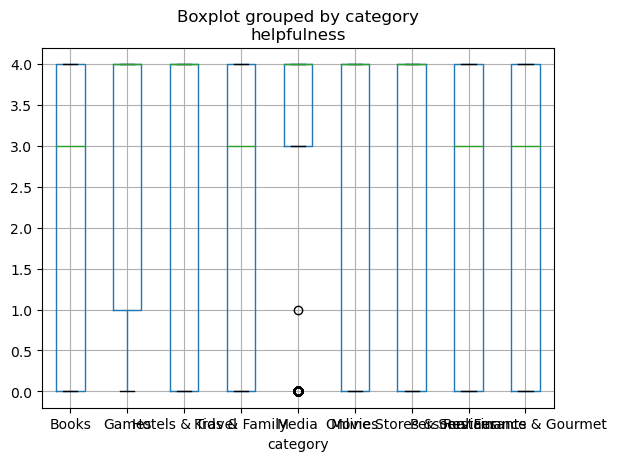

In [390]:
clean_ecom.boxplot("helpfulness",by ="category")
print('X- axis: Books, Games, Hotels & Travel, Kids & Family, Media, Movies, Online Stores & Services, Personal Finance, Restaurants & Gourmet' )
print ('Analysis:')
print ('average helpfulness score for books, Kids & family, Personal Finances and Resturants & gourment have aorund the same median or around 3.  However it seem the plots dont have a normal distrubtion, rather a more left skewed. this shows that average helpfulness scores tend to be higher. the media category quite different compared to the other catercorgies with the inter qurtile rande (spread) being much smaller.')

not much difference between gender. there seems to be a normal distrubtion in rating in terms of gender.


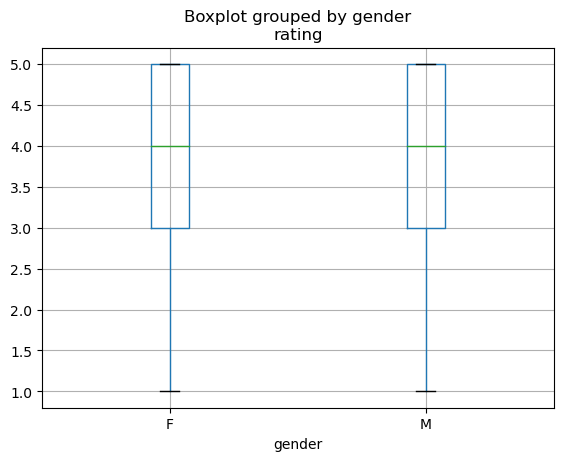

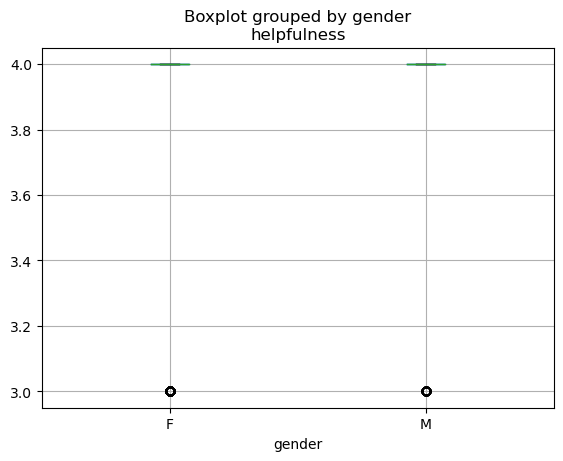

In [393]:
clean_ecom.boxplot("rating",by ="gender")
clean_ecom.boxplot("helpfulness",by ="gender")
print ("not much difference between gender. there seems to be a normal distrubtion in rating in terms of gender.")

In [347]:
items = clean_ecom.groupby('category')
print(items.helpfulness.describe())

                           count      mean       std  min  25%  50%  75%  max
category                                                                     
Books                       29.0  3.689655  0.470824  3.0  3.0  4.0  4.0  4.0
Games                      118.0  3.923729  0.266563  3.0  4.0  4.0  4.0  4.0
Hotels & Travel            189.0  3.947090  0.224448  3.0  4.0  4.0  4.0  4.0
Kids & Family              107.0  3.878505  0.328239  3.0  4.0  4.0  4.0  4.0
Media                      134.0  3.992537  0.086387  3.0  4.0  4.0  4.0  4.0
Movies                    1190.0  3.894958  0.306736  3.0  4.0  4.0  4.0  4.0
Online Stores & Services   570.0  3.935088  0.246587  3.0  4.0  4.0  4.0  4.0
Personal Finance            63.0  3.873016  0.335630  3.0  4.0  4.0  4.0  4.0
Restaurants & Gourmet      285.0  3.877193  0.328793  3.0  4.0  4.0  4.0  4.0


#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [392]:
clean_ecom = clean_ecom.drop(clean_ecom.index[clean_ecom.helpfulness <= 2] )
userCount = clean_ecom['userId'].value_counts()
clean_ecom = clean_ecom[~clean_ecom['userId'].isin(userCount[userCount < 7].index)]
itemCount = clean_ecom['item'].value_counts()
clean_ecom = clean_ecom[~clean_ecom['item'].isin(itemCount[itemCount < 11].index)]
print ("new length:")
clean_ecom.shape

new length:


(2685, 11)

In [1]:
# your code and solutions